<a href="https://colab.research.google.com/github/denverkim/DATA_MINING/blob/main/LAB6_CLASS_MON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 파일열기
train = pd.read_csv('/content/bigmart_train.csv')
test = pd.read_csv('/content/bigmart_test.csv')

In [7]:
print('훈련 상위 5개 데이터\n')
print(train.head())
print('테스트 상위 5개 데이터\n')
print(test.head())

훈련 상위 5개 데이터

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium     

# Data Inspection

In [16]:
# shape, dtypes, describe, 널값
print('훈련데이터 사이즈: ', train.shape)
print('테스트데이터 사이즈:', test.shape)
print('\n훈련데이터 타입:\n', train.dtypes) # 인코딩할 데이터 선정
print('\n테스트데이터 타입:\n', test.dtypes)
print('\n훈련데이터 요약:\n', train.describe())
print('\n테스트데이터 요약:\n', test.describe())
print('\n널값 확인:\n', train.isnull().sum()) # 널값 처리 예정
print('\n널값 확인:\n', test.isnull().sum())

훈련데이터 사이즈:  (8523, 12)
테스트데이터 사이즈: (5681, 11)

훈련데이터 타입:
 Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

테스트데이터 타입:
 Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

훈련데이터 요약:
        Item_Weight  Item_Visibility   

# Preliminary Analysis

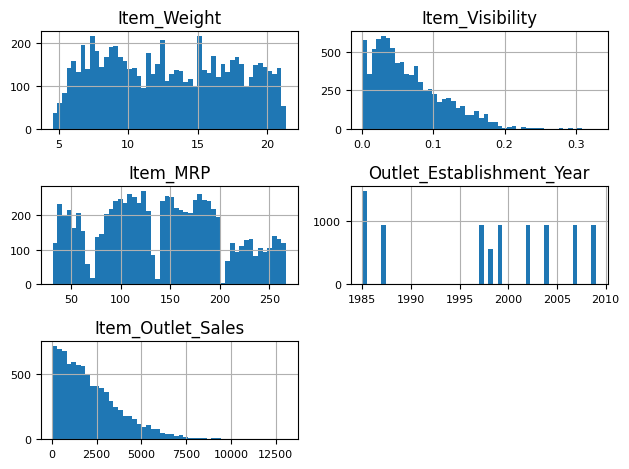

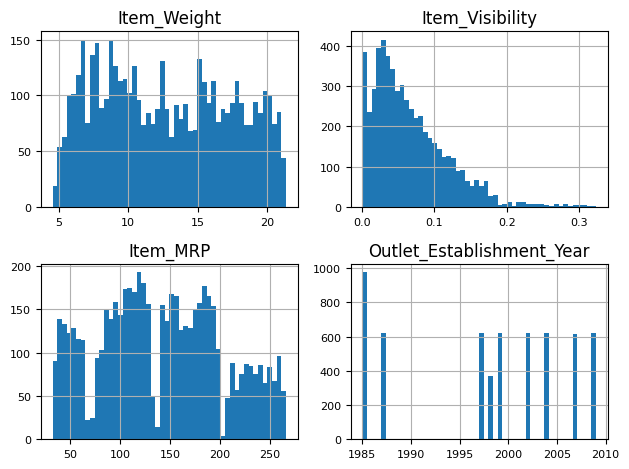

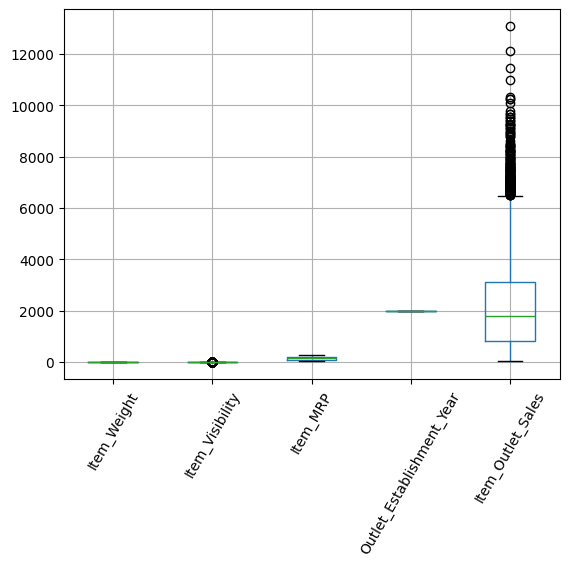

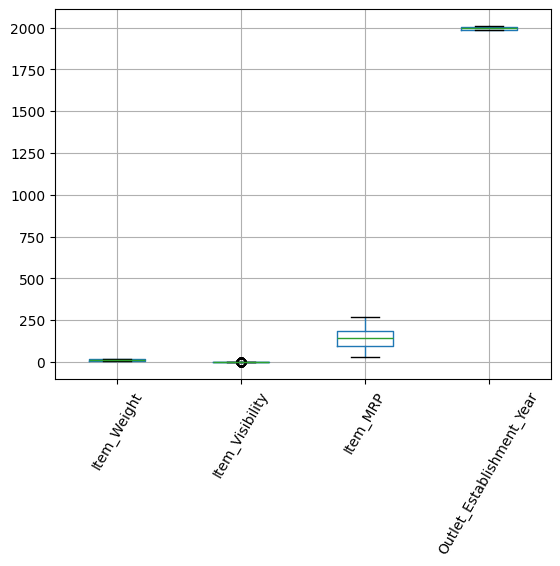

In [33]:
# 훈련, 테스트 데이터 히스토그램
train.hist(bins=50, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()
test.hist(bins=50, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

# 박스플랏 -> 스케일링 해야할 지 결정
train.boxplot()
plt.xticks(rotation=60)
plt.show()
test.boxplot()
plt.xticks(rotation=60)
plt.show()

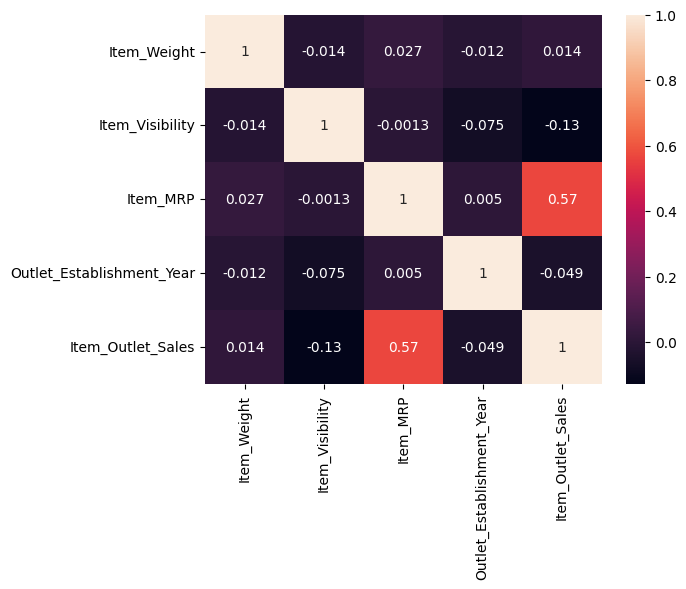

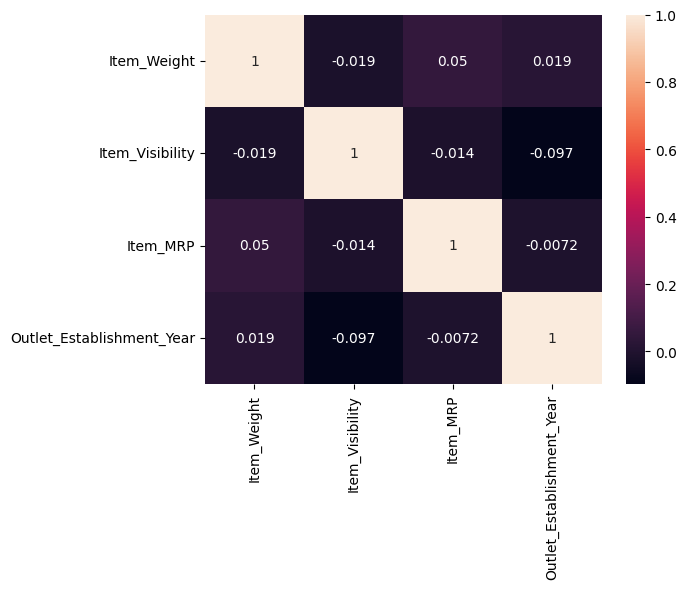

In [41]:
# 상관관계
col_lst = train.columns[train.dtypes != 'object']

sns.heatmap(train[col_lst].corr(), annot=True)
plt.show()

col_lst = test.columns[test.dtypes != 'object']
sns.heatmap(test[col_lst].corr(), annot=True)
plt.show()

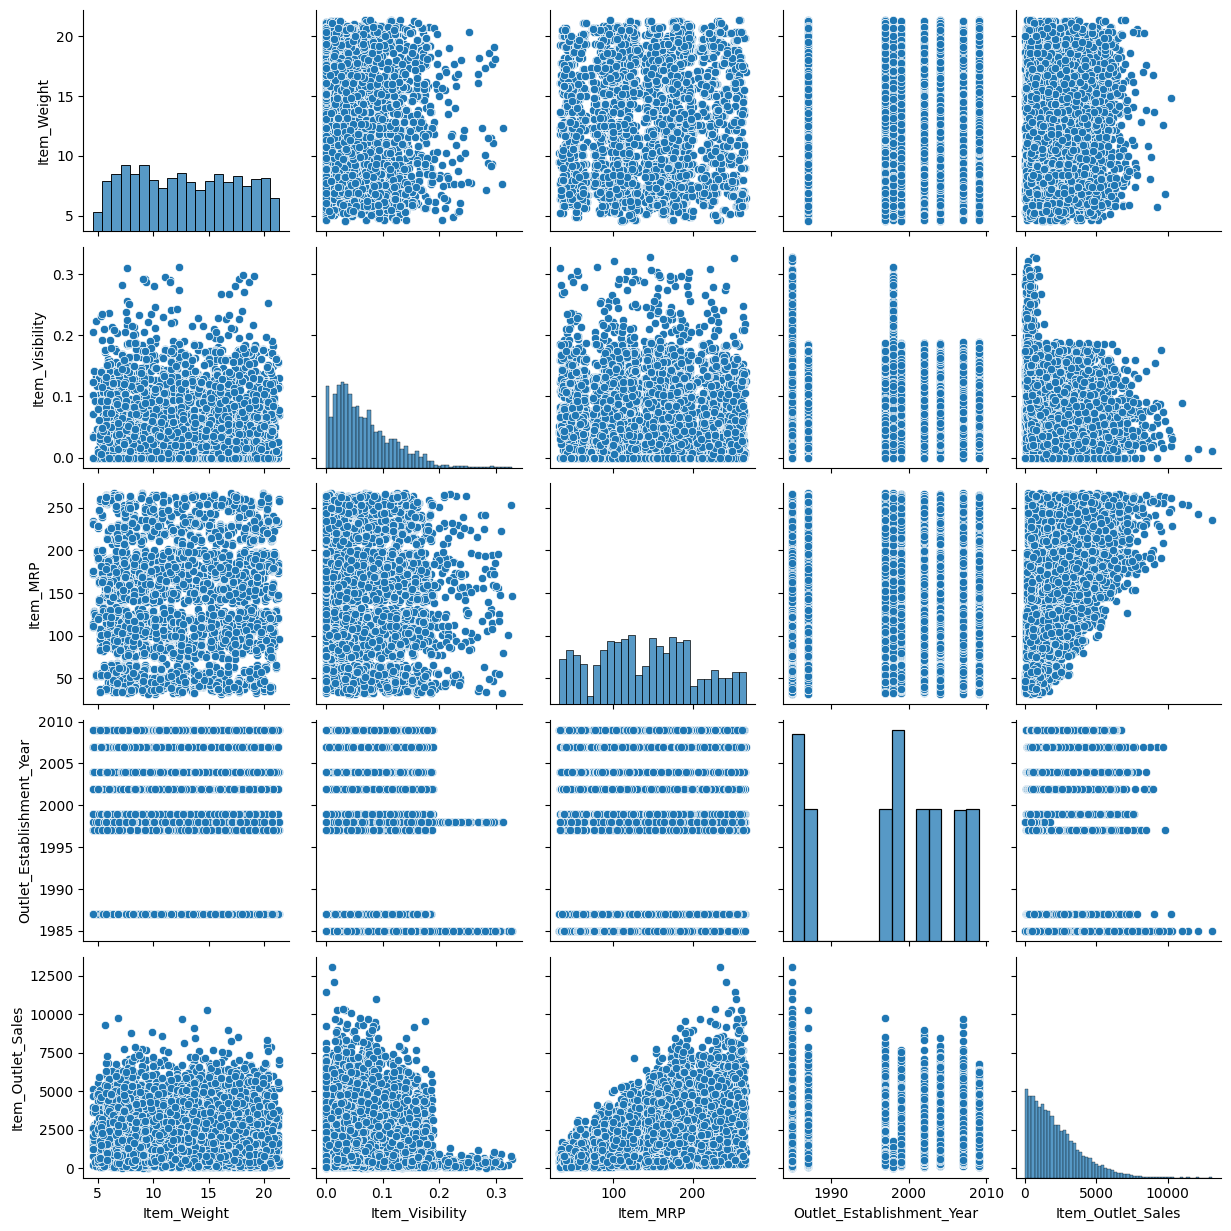

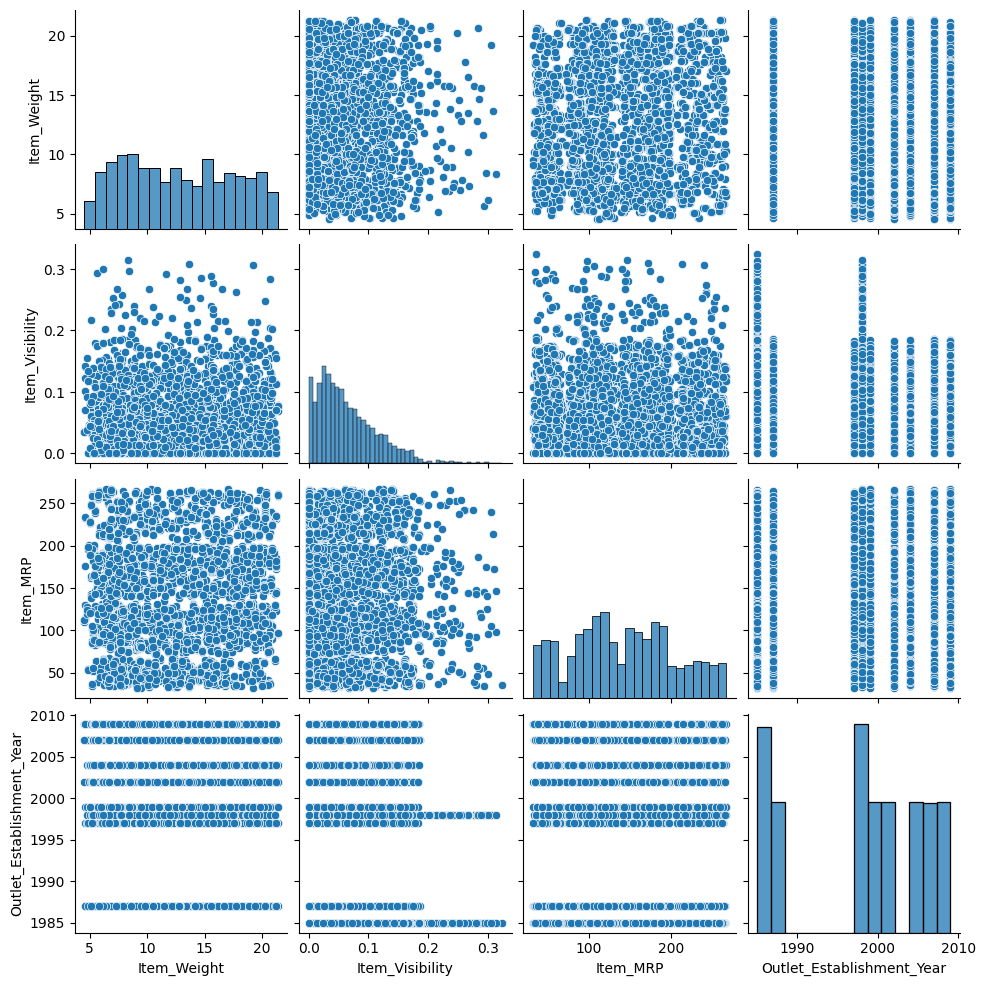

In [42]:
# 산점도
sns.pairplot(train)
plt.show()
sns.pairplot(test)
plt.show()

In [54]:
# 그래프 스타일 리스트
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [59]:
# 그래프 스타일 바꾸기
plt.style.use('fivethirtyeight')

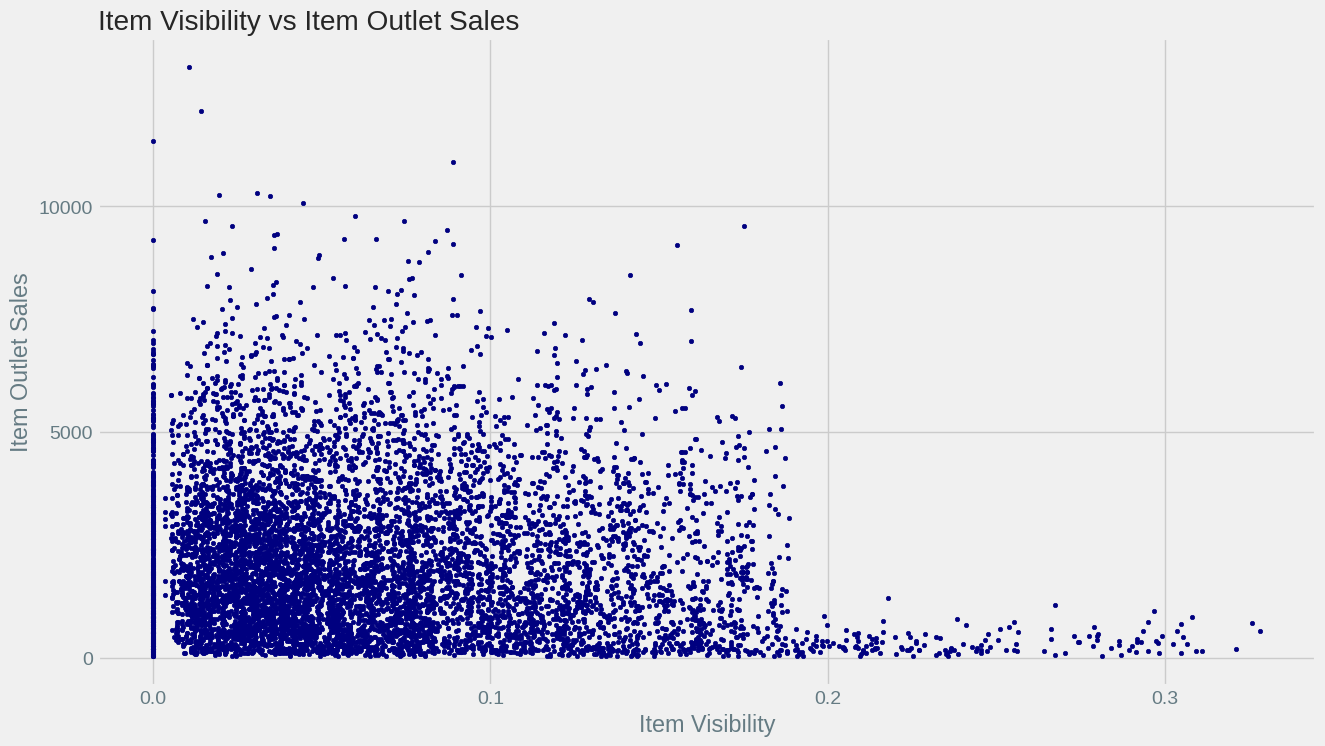

In [61]:
# 아이템 노출도에 따른 아웃렛세일
plt.figure(figsize=(14, 8))
plt.scatter(train['Item_Visibility'], train['Item_Outlet_Sales'], color='navy', marker='o', s=10)
plt.grid(True)
plt.title('Item Visibility vs Item Outlet Sales',loc='left')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.yticks([0, 5000, 10000])
plt.xticks([0, 0.1, 0.2, 0.3])
plt.show()

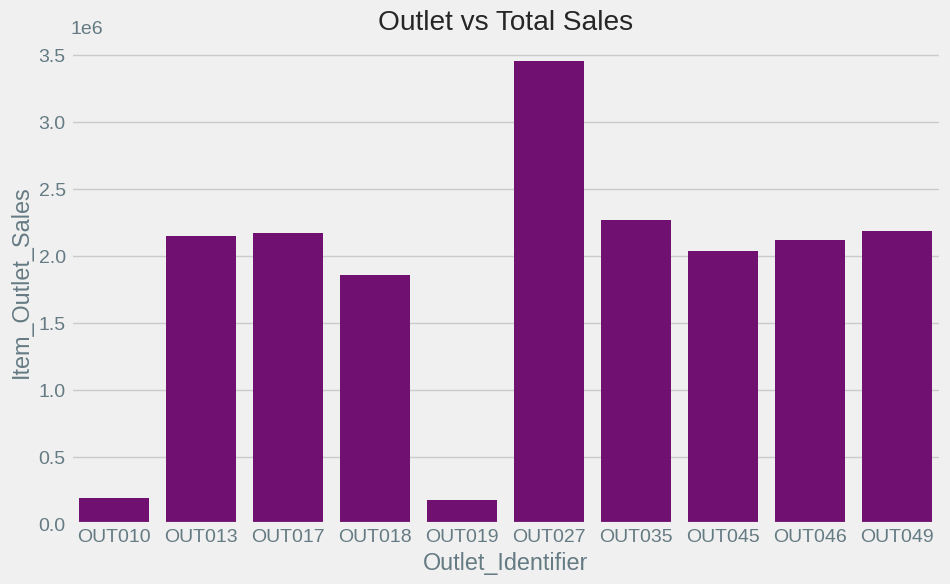

In [62]:
# 아웃렛에 따른 총판매량
sales_per_outlet = train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=sales_per_outlet,color= "purple")
# 그래프 레이블 추가
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Outlet vs Total Sales")
plt.show()

Item_Type
Baking Goods             1.265525e+06
Breads                   5.532372e+05
Breakfast                2.322990e+05
Canned                   1.444151e+06
Dairy                    1.522594e+06
Frozen Foods             1.825735e+06
Fruits and Vegetables    2.820060e+06
Hard Drinks              4.577934e+05
Health and Hygiene       1.045200e+06
Household                2.055494e+06
Meat                     9.175656e+05
Others                   3.255176e+05
Seafood                  1.488682e+05
Snack Foods              2.732786e+06
Soft Drinks              8.928977e+05
Starchy Foods            3.514013e+05
Name: Item_Outlet_Sales, dtype: float64


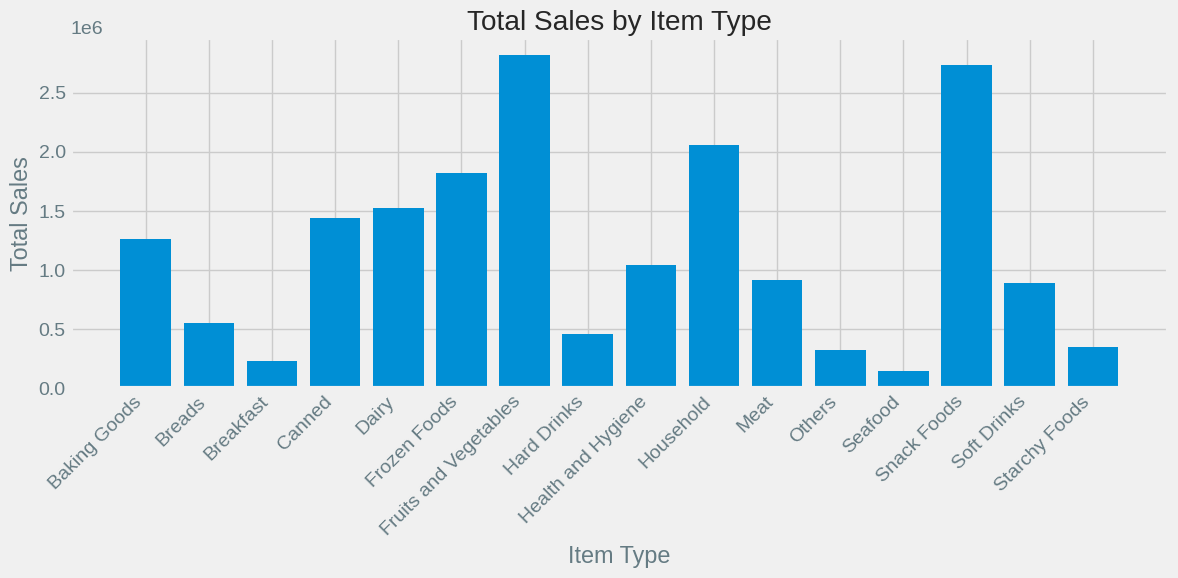

In [65]:
# 아이템 종류에 따른 총판매량
item_type_sales = train.groupby('Item_Type')['Item_Outlet_Sales'].sum()

print(item_type_sales)

plt.figure(figsize=(12, 6))
plt.bar(item_type_sales.index, item_type_sales.values)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

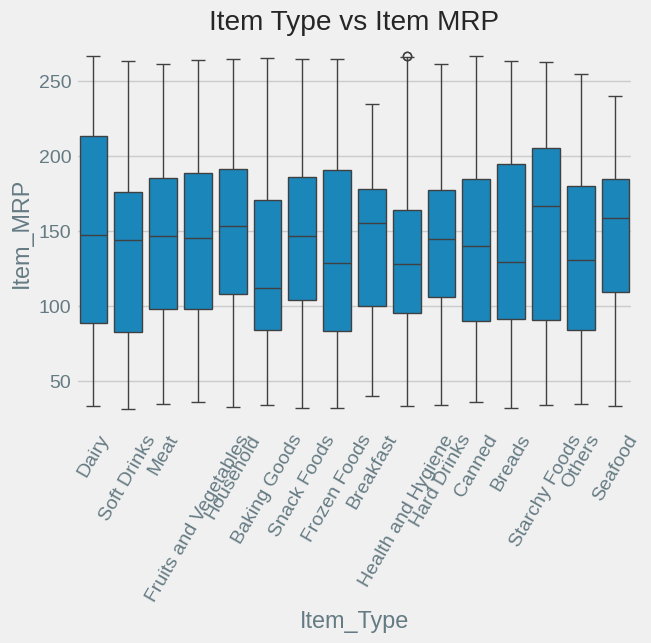

In [60]:
# 아이템 종류에 따른 상품가격 박스플랏
sns.boxplot(x='Item_Type', y='Item_MRP', data=train)
plt.xticks(rotation=60)
plt.title('Item Type vs Item MRP')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)